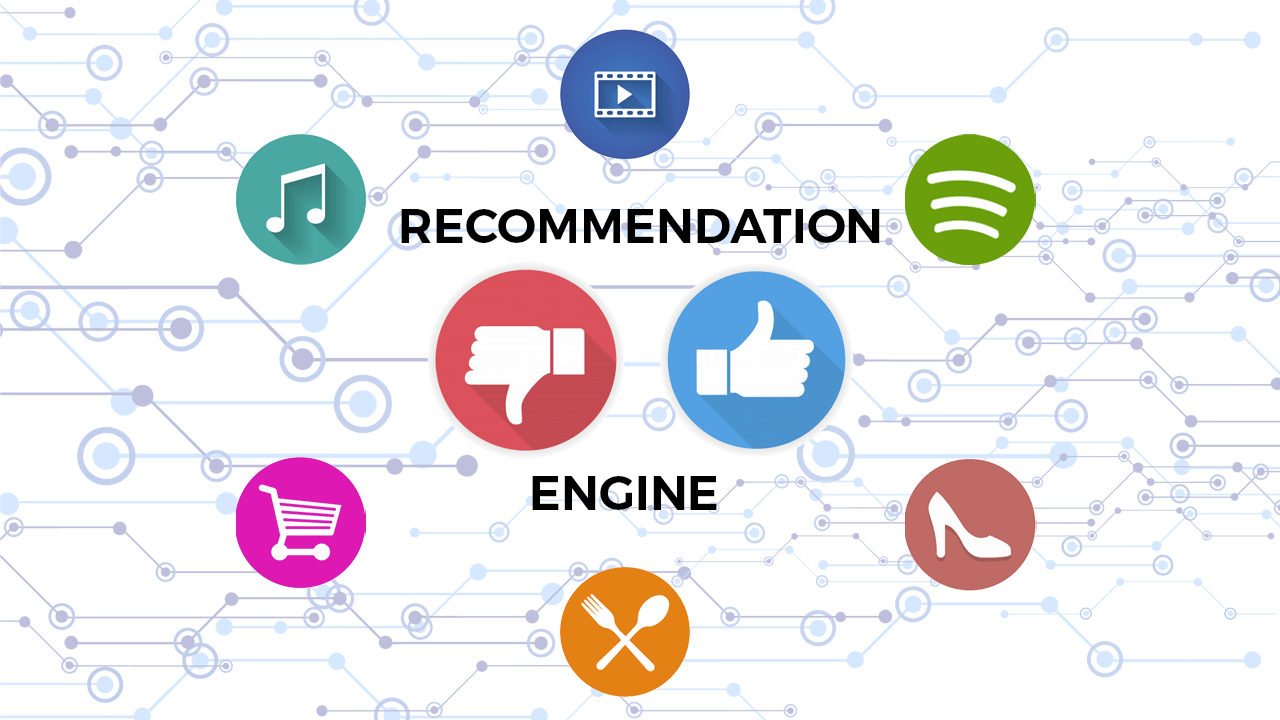

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('C:/Users/WiseMan/Downloads/archive (7)/Dataset.csv')
movies = pd.read_csv('C:/Users/WiseMan/Downloads/archive (7)/Movie_Id_Titles.csv')

In [3]:
movies.head(35)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [4]:
ratings.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
len(ratings)

100003

In [6]:
len(movies)

1682

In [7]:
df = pd.merge(ratings, movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
len(df)

100003

In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['n_rate'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [14]:
ratings.head()

,rating,n_rate
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


(array([ 69.,   3.,   4.,  12.,   5.,  13.,  17.,  59.,  27.,  42.,  66.,
         70.,  83.,  93.,  57., 181., 130.,  99., 120., 109., 107.,  91.,
        109.,  44.,  29.,   9.,   5.,   1.,   0.,  10.]),
 array([1.        , 1.13333333, 1.26666667, 1.4       , 1.53333333,
        1.66666667, 1.8       , 1.93333333, 2.06666667, 2.2       ,
        2.33333333, 2.46666667, 2.6       , 2.73333333, 2.86666667,
        3.        , 3.13333333, 3.26666667, 3.4       , 3.53333333,
        3.66666667, 3.8       , 3.93333333, 4.06666667, 4.2       ,
        4.33333333, 4.46666667, 4.6       , 4.73333333, 4.86666667,
        5.        ]),
 <BarContainer object of 30 artists>)

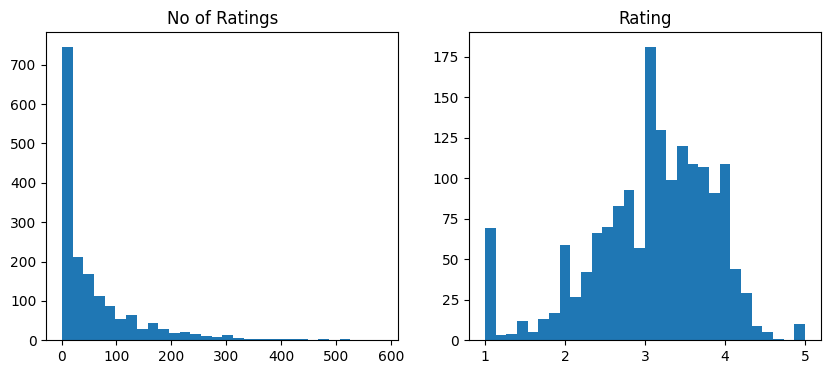

In [15]:
f, (ax1,ax2) = plt.subplots(nrows=1 , ncols=2 , figsize=[10,4])
ax1.set_title("No of Ratings")
ax1.hist(ratings.n_rate,bins=30)
ax2.set_title("Rating")
ax2.hist(ratings.rating,bins=30)

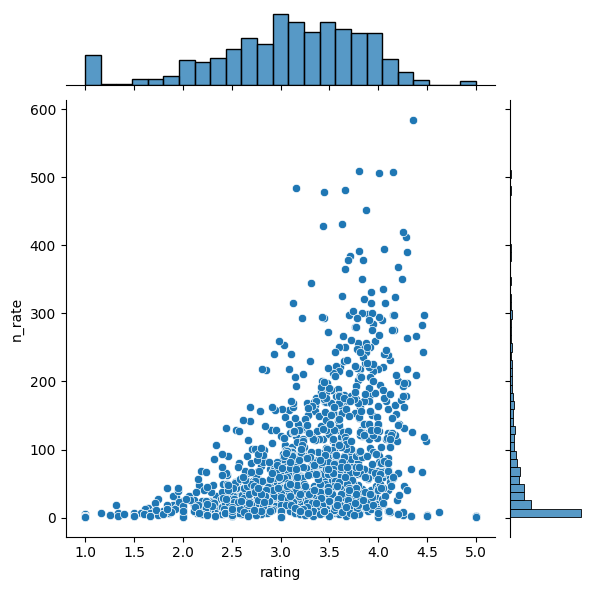

In [16]:
import seaborn as sns
sns.jointplot(x='rating', y='n_rate', data=ratings)

In [17]:
rating_mat=df.pivot_table(values='rating',index='user_id',columns='title')

In [18]:
ratings.sort_values('n_rate', ascending = False).head(10)

,rating,n_rate
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [19]:
movies[movies['title'] == 'Star Wars (1977)']

,item_id,title
49,50,Star Wars (1977)


In [20]:
movies[movies['title'] == 'English Patient, The (1996)']

,item_id,title
285,286,"English Patient, The (1996)"


In [21]:
fg_usr_ratings = rating_mat["Star Wars (1977)"]
matrix_usr_ratings = rating_mat["Contact (1997)"]

In [22]:
similar_to_fg = rating_mat.corrwith(fg_usr_ratings)
similar_to_matrix = rating_mat.corrwith(matrix_usr_ratings)

C:\Users\WiseMan\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\WiseMan\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\WiseMan\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\WiseMan\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [23]:
similar_to_fg.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [24]:
corr_matrix=pd.DataFrame(similar_to_matrix, columns=['correlation'])
corr_matrix.dropna(inplace=True)
corr_matrix.head(10)

,correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031
"20,000 Leagues Under the Sea (1954)",0.052442
2001: A Space Odyssey (1968),0.014245
"39 Steps, The (1935)",-0.538617
8 1/2 (1963),-0.076123


In [25]:
corr_matrix.sort_values('correlation', ascending=False)

,correlation
title,
Lamerica (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0
Contact (1997),1.0
...,...
Dingo (1992),-1.0
Romper Stomper (1992),-1.0
Hearts and Minds (1996),-1.0


(array([601., 198., 123., 120.,  83.,  77.,  60.,  49.,  37.,  30.,  44.,
         22.,  21.,  23.,  26.,  19.,  13.,  12.,  17.,   8.,  10.,  10.,
          7.,   6.,   4.,  13.,   1.,   5.,   2.,   3.,   0.,   2.,   3.,
          3.,   0.,   2.,   2.,   0.,   1.,   0.,   1.,   2.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  12.66,  24.32,  35.98,  47.64,  59.3 ,  70.96,  82.62,
         94.28, 105.94, 117.6 , 129.26, 140.92, 152.58, 164.24, 175.9 ,
        187.56, 199.22, 210.88, 222.54, 234.2 , 245.86, 257.52, 269.18,
        280.84, 292.5 , 304.16, 315.82, 327.48, 339.14, 350.8 , 362.46,
        374.12, 385.78, 397.44, 409.1 , 420.76, 432.42, 444.08, 455.74,
        467.4 , 479.06, 490.72, 502.38, 514.04, 525.7 , 537.36, 549.02,
        560.68, 572.34, 584.  ]),
 <BarContainer object of 50 artists>)

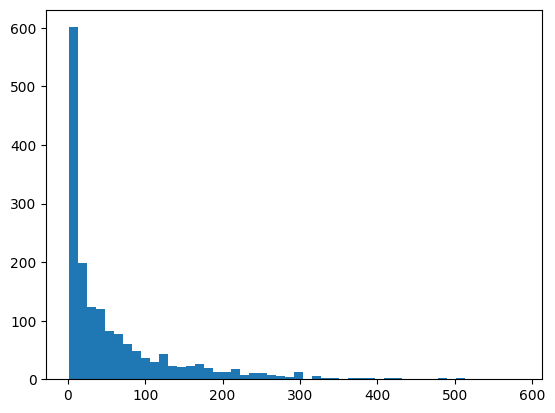

In [26]:
plt.hist(ratings.n_rate, bins=50)

In [27]:
corr_matrix = corr_matrix.join(ratings.n_rate)
corr_matrix.head()

,correlation,n_rate
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [28]:
corr_matrix[corr_matrix.n_rate > 50].sort_values('correlation',ascending =False)

,correlation,n_rate
title,,
Contact (1997),1.000000,509
Tin Men (1987),0.689929,51
Nell (1994),0.549230,81
Tales from the Crypt Presents: Bordello of Blood (1996),0.540568,55
"Spitfire Grill, The (1996)",0.528615,97
...,...,...
Home for the Holidays (1995),-0.275778,58
Jean de Florette (1986),-0.313023,64
Sunset Blvd. (1950),-0.324341,65
